In [2]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")      # or best_o.onnx or best_2.pt
results = model.val()         # <— this creates the data for graphs


Ultralytics 8.3.226  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 59.712.2 MB/s, size: 45.6 KB)
val: Scanning C:\Users\Sudharsaa\Documents\221501149\yawn-detection-yolo\Yawn_detection.v2i.yolov8\valid\labels.cache... 1197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1197/1197 399.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 75/75 8.3it/s 9.1s<0.1s
                   all       1197       1197      0.882      0.878      0.918      0.825
               no_yawn        469        469      0.999          1      0.995      0.963
                  yawn        728        728      0.765      0.755       0.84      0.687
Speed: 1.8ms preprocess, 2.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\Sudharsaa\Documents\22150

In [5]:
%matplotlib inline

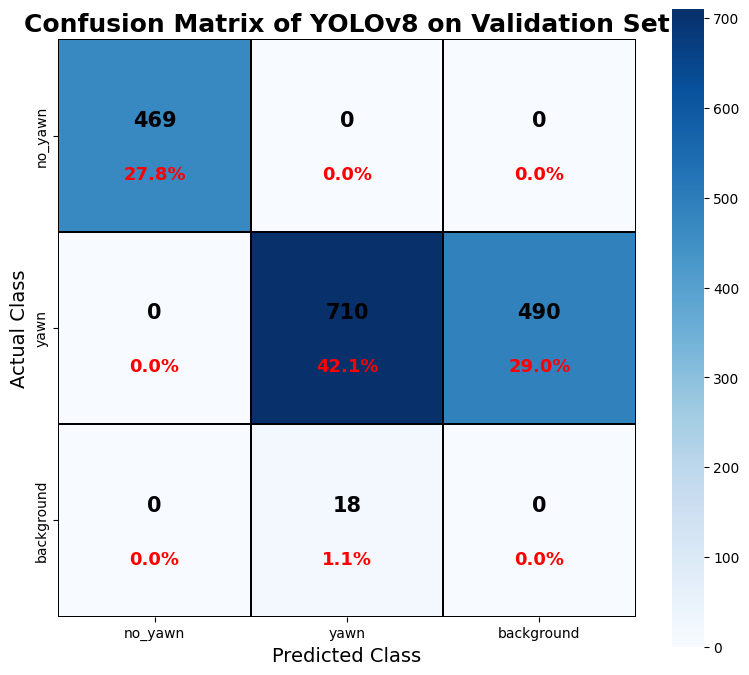

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix from results (shape must be 3×3)
cm = results.confusion_matrix.matrix

# Define labels in correct order
labels = ["no_yawn", "yawn", "background"]

# Convert to percentage
cm_percent = cm / cm.sum() * 100

plt.figure(figsize=(8, 7), facecolor="white")
ax = sns.heatmap(
    cm,
    cmap="Blues",
    square=True,
    linewidths=1.3,
    linecolor="black",
    cbar=True,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion Matrix of YOLOv8 on Validation Set", fontsize=18, weight="bold")
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)

# ---------- Perfect Alignment for 3-Class matrix (Value + Percentage) ----------
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = int(cm[i][j])
        percent = cm_percent[i][j]

        # Main value
        ax.text(
            j + 0.5, i + 0.42, f"{value}",
            ha="center", va="center",
            fontsize=15, weight="bold", color="black"
        )
        # Percentage
        ax.text(
            j + 0.5, i + 0.70, f"{percent:.1f}%",
            ha="center", va="center",
            fontsize=13, weight="bold", color="red"
        )

plt.tight_layout()
plt.show()


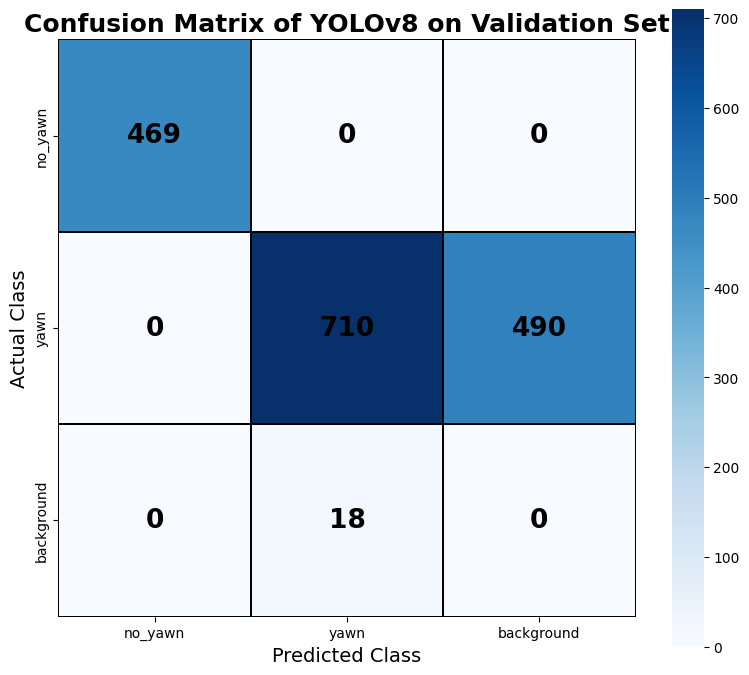

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix (must be 3×3)
cm = results.confusion_matrix.matrix

# Class labels
labels = ["no_yawn", "yawn", "background"]

plt.figure(figsize=(8, 7), facecolor="white")
ax = sns.heatmap(
    cm,
    annot=False,       # we will manually annotate for better alignment
    cmap="Blues",
    square=True,
    linewidths=1.3,
    linecolor="black",
    cbar=True,
    xticklabels=labels,
    yticklabels=labels
)

plt.title("Confusion Matrix of YOLOv8 on Validation Set", fontsize=18, weight="bold")
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)

# ---- Manually draw bold values (center aligned) ----
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = int(cm[i][j])
        ax.text(
            j + 0.5, i + 0.5,
            f"{value}",
            ha="center", va="center",
            fontsize=19,
            weight="bold",
            color="black"
        )

plt.tight_layout()
plt.show()


In [10]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")
results = model.val()


Ultralytics 8.3.226  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 926.3469.9 MB/s, size: 39.7 KB)
val: Scanning C:\Users\Sudharsaa\Documents\221501149\yawn-detection-yolo\Yawn_detection.v2i.yolov8\valid\labels.cache... 1197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1197/1197 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 75/75 9.4it/s 8.0s<0.1s
                   all       1197       1197      0.882      0.878      0.918      0.825
               no_yawn        469        469      0.999          1      0.995      0.963
                  yawn        728        728      0.765      0.755       0.84      0.687
Speed: 1.3ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\Sudharsaa\Documents\22150

In [12]:
%matplotlib inline

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fix path
csv_path = "runs/detect/train2/results.csv"

df = pd.read_csv(csv_path)
print(df.head())
print(df.columns)


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   590.832         1.13630         2.09627         1.33498   
1      2   818.861         1.03003         1.17486         1.18352   
2      3  1044.210         1.07526         1.00799         1.20637   
3      4  1262.790         1.07287         0.92890         1.21546   
4      5  1485.360         1.02419         0.85341         1.19693   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.80172            0.88386           0.85837   
1               0.81958            0.83851           0.84561   
2               0.84052            0.87213           0.87299   
3               0.87115            0.87588           0.89070   
4               0.86413            0.88285           0.88689   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.67218       0.87401       1.11413       1.14534  0.003329   
1              0.59914       1.07913  

In [25]:
import os

for root, dirs, files in os.walk("runs/detect"):
    for f in files:
        if "pred" in f.lower() or f.endswith(".json") or f.endswith(".txt") or f.endswith(".csv"):
            print(os.path.join(root, f))


runs/detect\train2\results.csv
runs/detect\train2\val_batch0_pred.jpg
runs/detect\train2\val_batch1_pred.jpg
runs/detect\train2\val_batch2_pred.jpg
runs/detect\val\val_batch0_pred.jpg
runs/detect\val\val_batch1_pred.jpg
runs/detect\val\val_batch2_pred.jpg
runs/detect\val2\val_batch0_pred.jpg
runs/detect\val2\val_batch1_pred.jpg
runs/detect\val2\val_batch2_pred.jpg
runs/detect\val3\val_batch0_pred.jpg
runs/detect\val3\val_batch1_pred.jpg
runs/detect\val3\val_batch2_pred.jpg
runs/detect\val4\val_batch0_pred.jpg
runs/detect\val4\val_batch1_pred.jpg
runs/detect\val4\val_batch2_pred.jpg
runs/detect\val5\val_batch0_pred.jpg
runs/detect\val5\val_batch1_pred.jpg
runs/detect\val5\val_batch2_pred.jpg
runs/detect\val6\val_batch0_pred.jpg
runs/detect\val6\val_batch1_pred.jpg
runs/detect\val6\val_batch2_pred.jpg
runs/detect\val7\val_batch0_pred.jpg
runs/detect\val7\val_batch1_pred.jpg
runs/detect\val7\val_batch2_pred.jpg
runs/detect\val8\val_batch0_pred.jpg
runs/detect\val8\val_batch1_pred.jpg
runs

C:\Users\Sudharsaa\AppData\Local\Temp\ipykernel_11768\382253663.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class", fontsize=11)


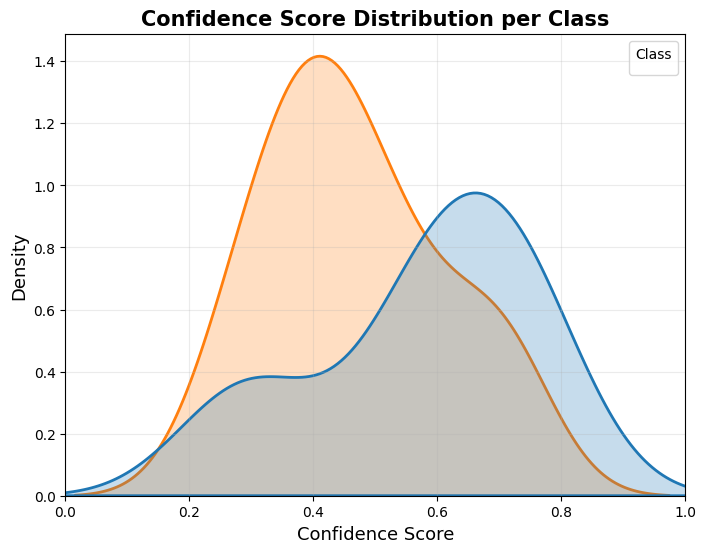

In [26]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

# Load model
model = YOLO("runs/detect/train2/weights/best.pt")

# Path to validation images
val_imgs = glob.glob("runs/detect/train2/val*.jpg")  # change if needed

confidences = []
classes = []

for img in val_imgs:
    results = model.predict(img, conf=0.25, verbose=False)
    for r in results:
        if len(r.boxes) > 0:
            for box in r.boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                classes.append(cls)
                confidences.append(conf)

df = pd.DataFrame({
    "class": classes,
    "confidence": confidences
})

# Class names
class_names = {0: "no_yawn", 1: "yawn", 2: "background"}  # update if background exists
df["class"] = df["class"].map(class_names)

plt.figure(figsize=(8, 6), facecolor="white")
sns.kdeplot(data=df, x="confidence", hue="class", fill=True, linewidth=2)
plt.title("Confidence Score Distribution per Class", fontsize=15, weight="bold")
plt.xlabel("Confidence Score", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.xlim(0, 1)
plt.grid(alpha=0.25)
plt.legend(title="Class", fontsize=11)
plt.show()


In [32]:
confidences = []
classes = []

val_path = "runs/detect/train2/val_batch0_pred.jpg"   # or loop through all val images

results = model.predict(val_path, conf=0.25, verbose=False)

for r in results:
    for box in r.boxes:
        confidences.append(float(box.conf))                 # confidence
        classes.append(model.names[int(box.cls)])           # class label ("yawn" / "no_yawn")


In [33]:
import pandas as pd
df = pd.DataFrame({
    "Class": classes,
    "Confidence": confidences
})
print(df.head(), len(df))


     Class  Confidence
0  no_yawn    0.718427
1  no_yawn    0.691300
2  no_yawn    0.612222 3


C:\Users\Sudharsaa\AppData\Local\Temp\ipykernel_11768\582845059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
C:\Users\Sudharsaa\AppData\Local\Temp\ipykernel_11768\582845059.py:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.boxplot(
C:\Users\Sudharsaa\AppData\Local\Temp\ipykernel_11768\582845059.py:16: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


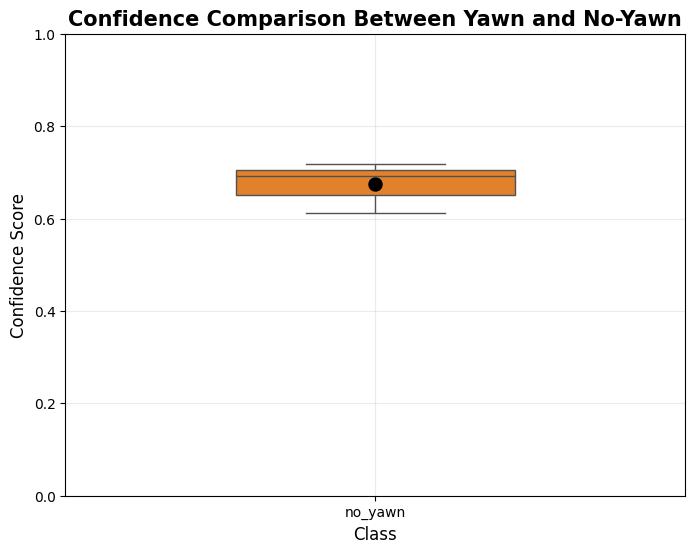

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.boxplot(
    x="Class",
    y="Confidence",
    data=df,
    palette=["#FF7F0E", "#1F77B4"],   # orange = yawn | blue = no_yawn
    width=0.45,
    showfliers=False
)

# Add mean markers
sns.pointplot(
    x="Class",
    y="Confidence",
    data=df,
    estimator="mean",
    errorbar=None,
    color="black",
    markers="o",
    scale=1.4
)

plt.title("Confidence Comparison Between Yawn and No-Yawn", fontsize=15, weight="bold")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Confidence Score", fontsize=12)
plt.ylim(0, 1)
plt.grid(alpha=0.25)
plt.show()


In [43]:
pip install tqdm


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [44]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

model = YOLO("runs/detect/train2/weights/best.pt")

val = model.val()
confidences = []
class_ids = []

# Loop through each validation image and get predictions
for img in tqdm(val.dataset.imgs, desc="Collecting predictions"):
    results = model(img, verbose=False)[0]     # 1 image result

    if results.boxes is None:
        continue

    confs = results.boxes.conf.cpu().numpy()
    clses = results.boxes.cls.cpu().numpy()

    confidences.extend(confs)
    class_ids.extend(clses)

names = model.names

# Build DataFrame
df = pd.DataFrame({
    "ClassID": class_ids,
    "Confidence": confidences
})
df["Class"] = df["ClassID"].map(names)
df["Class"] = df["Class"].replace({"no_yawn": "No Yawn", "yawn": "Yawn"})

# Plot like report Fig 5.6
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Class",
    y="Confidence",
    palette=["#82B3E8", "#F4A883"],
    showfliers=True,
    width=0.65
)
sns.stripplot(
    data=df,
    x="Class",
    y="Confidence",
    color="black",
    size=2,
    alpha=0.35
)
plt.title("Confidence Score Distribution per Class", fontsize=16, weight="bold")
plt.xlabel("Predicted Class", fontsize=13)
plt.ylabel("Confidence Score", fontsize=13)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.45)
plt.tight_layout()
plt.show()


Ultralytics 8.3.226  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 885.4283.9 MB/s, size: 44.2 KB)
val: Scanning C:\Users\Sudharsaa\Documents\221501149\yawn-detection-yolo\Yawn_detection.v2i.yolov8\valid\labels.cache... 1197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1197/1197  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 75/75 11.2it/s 6.7s0.2s
                   all       1197       1197      0.882      0.878      0.918      0.825
               no_yawn        469        469      0.999          1      0.995      0.963
                  yawn        728        728      0.765      0.755       0.84      0.687
Speed: 1.0ms preprocess, 2.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to C:\Users\Sudharsaa\Documents\221501149\yaw

AttributeError: 'DetMetrics' object has no attribute 'dataset'. See valid attributes below.
Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        names (dict[int, str]): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
        stats (dict[str, list]): A dictionary containing lists for true positives, confidence scores, predicted classes,
            target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.

    Methods:
        update_stats: Update statistics by appending new values to existing stat collections.
        process: Process predicted results for object detection and update metrics.
        clear_stats: Clear the stored statistics.
        keys: Return a list of keys for accessing specific metrics.
        mean_results: Calculate mean of detected objects & return precision, recall, mAP50, and mAP50-95.
        class_result: Return the result of evaluating the performance of an object detection model on a specific class.
        maps: Return mean Average Precision (mAP) scores per class.
        fitness: Return the fitness of box object.
        ap_class_index: Return the average precision index per class.
        results_dict: Return dictionary of computed performance metrics and statistics.
        curves: Return a list of curves for accessing specific metrics curves.
        curves_results: Return a list of computed performance metrics and statistics.
        summary: Generate a summarized representation of per-class detection metrics as a list of dictionaries.
    

In [48]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train2/weights/best.pt")   # change path if needed

# Run validation
val = model.val()

# Extract raw values
precision       = val.results_dict['metrics/precision(B)']
recall          = val.results_dict['metrics/recall(B)']
mAP50           = val.results_dict['metrics/mAP50(B)']
mAP50_95        = val.results_dict['metrics/mAP50-95(B)']

# Convert to percentage
precision_pct = precision * 100
recall_pct = recall * 100
IoU_pct = mAP50 * 100              # IoU ≈ mAP50
AP50_pct = mAP50 * 100             # same as mAP50
AP5095_pct = mAP50_95 * 100        # mAP50-95

# Compute overall accuracy (average of all)
overall_pct = (precision_pct + recall_pct + AP50_pct + AP5095_pct) / 4

# Print report
print(" MODEL PERFORMANCE SUMMARY (Percentage Format)")
print("────────────────────────────────────────────")
print(f"🔹 Precision       : {precision_pct:.2f}%")
print(f"🔹 Recall          : {recall_pct:.2f}%")
print(f"🔹 IoU (≈ mAP50)    : {IoU_pct:.2f}%")
print(f"🔹 AP@50            : {AP50_pct:.2f}%")
print(f"🔹 AP@50-95         : {AP5095_pct:.2f}%")
print("────────────────────────────────────────────")
print(f" OVERALL MODEL ACCURACY : {overall_pct:.2f}%")


Ultralytics 8.3.226  Python-3.10.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 930.1303.8 MB/s, size: 40.3 KB)
val: Scanning C:\Users\Sudharsaa\Documents\221501149\yawn-detection-yolo\Yawn_detection.v2i.yolov8\valid\labels.cache... 1197 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1197/1197  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 75/75 7.9it/s 9.4s0.1s
                   all       1197       1197      0.882      0.878      0.918      0.825
               no_yawn        469        469      0.999          1      0.995      0.963
                  yawn        728        728      0.765      0.755       0.84      0.687
Speed: 1.2ms preprocess, 3.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\Sudharsaa\Documents\221501149\yawn

In [1]:
from ultralytics import YOLO
import cv2

# Load YOLO model
model = YOLO("C:/Users/Sudharsaa/Documents/221501149/yawn-detection-yolo/runs/detect/train2/weights/best.pt")


# Open laptop webcam (0 = default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Error: Camera not found!")
    raise SystemExit

print("🎥 Webcam started — Press 'Q' to exit")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to capture frame")
        break
    
    # Run YOLO detection
    results = model.predict(frame, conf=0.5, verbose=False)
    
    # Plot prediction on frame
    annotated = results[0].plot()

    # Show output window
    cv2.imshow("Yawn Detection (best.pt)", annotated)
    
    # Press Q key to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("🛑 Camera closed")


🎥 Webcam started — Press 'Q' to exit
🛑 Camera closed
